This is some graph theory review. I'm going to use the following notation:

* $G$ is a graph
* $V$ is the set of vertices
* $E$ is the set of edges
* $u, v$ are vertices
* $e$ is an edge
* $w$ is a weight
* $d$ is a distance

Going to review the following topics:
* Dijkstra's algorithm
* Eulerian path
* Eulerian circuit
* Fleury's algorithm
* Eulerization
* Hamiltonian path
* Traveling Salesman Problem
* Nearest neighbor
* Sorted Edges
* Kruskal's algorithm

If I get time I will look into Graph Convolutional Networks.

Source: https://www.youtube.com/watch?v=sWsXBY19o8I&ab_channel=AcademicLesson

In [ ]:
# Representing Graphs
# 6 Vertices with weights

# Using Adjacency Matrix
adjMatrix = [
    [0,0,0,15,14,0],
    [0,0,0,18,24,19],
    [0,0,0,18,15,25],
    [15,18,18,0,14,0],
    [14,24,15,14,0,0],
    [0,19,25,0,0,0]
    ]

# Using Adjacency List
adjList = [
    [(3,15),(4,14)],
    [(3,18),(4,24),(5,19)],
    [(3,18),(4,15),(5,25)],
    [(0,15),(1,18),(2,18),(4,14)],
    [(0,14),(1,24),(2,15),(3,14)],
    [(1,19),(2,25)]
    ]

# Using Edge List
edgeList = [(0,3,15),(0,4,14),
            (1,3,18),(1,4,24),(1,5,19),
            (2,3,18),(2,4,15),(2,5,25),
            (3,0,15),(3,1,18),(3,2,18),(3,4,14),
            (4,0,14),(4,1,24),(4,2,15),(4,3,14),
            (5,1,19),(5,2,25)]

In [ ]:
# Use Adjacency Matrix and Dijkstra's Algorithm to find the shortest path from vertex 0 to vertex 5
# Dijkstra's Algorithm
# 1. Find the vertex with the smallest distance from the source vertex
# 2. Update the distance of all the vertices adjacent to the vertex found in step 1
# 3. Repeat steps 1 and 2 until all the vertices have been visited
# 4. The shortest path from the source vertex to all the other vertices is found

def dijkstra(graph, start, end):
    # Initialize the distance of all the vertices to infinity
    distance = [float('inf') for i in range(len(graph))]
    # Initialize the distance of the source vertex to 0
    distance[start] = 0
    # Initialize the visited list to False
    visited = [False for i in range(len(graph))]
    # Initialize the parent list to None
    parent = [None for i in range(len(graph))]
    # Initialize the current vertex to the source vertex
    current = start
    # Repeat until all the vertices have been visited
    while not visited[end]:
        # Find the vertex with the smallest distance from the source vertex
        for i in range(len(graph)):
            if not visited[i] and distance[i] < distance[current]:
                current = i
        # Update the distance of all the vertices adjacent to the vertex found in step 1
        for i in range(len(graph)):
            if not visited[i] and graph[current][i] != 0:
                if distance[current] + graph[current][i] < distance[i]:
                    distance[i] = distance[current] + graph[current][i]
                    parent[i] = current
        # Mark the current vertex as visited
        visited[current] = True
        # Repeat steps 1 and 2 until all the vertices have been visited
    # The shortest path from the source vertex to all the other vertices is found
    # Find the shortest path from the source vertex to the destination vertex
    path = []
    while current != start:
        path.append(current)
        current = parent[current]
    path.append(start)
    path.reverse()
    return path

# Find the shortest path from vertex 0 to vertex 5
print(dijkstra(adjMatrix, 0, 5))

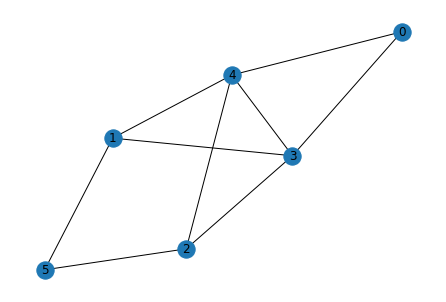

In [9]:
# Using NetworkX

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5])
G.add_weighted_edges_from([(0,3,15), (0,4,14), (1,3,18), (1,4,24), (1,5,19), (2,3,18), (2,4,15), (2,5,25), (3,4,14)])
nx.draw(G, with_labels=True)
plt.show()

In [11]:
# Shortest Path
sp = nx.dijkstra_path(G, 0, 5)
print(sp)

# Shortest Path Length
spl = nx.dijkstra_path_length(G, 0, 5)
print(spl)

[0, 3, 1, 5]
52


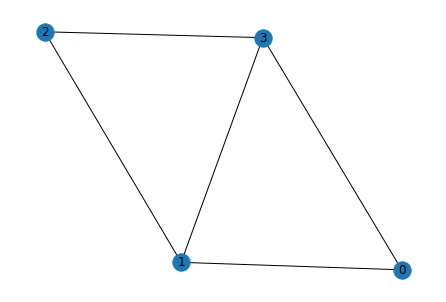

[(1, 0), (0, 3), (3, 1), (1, 2), (2, 3)]


In [12]:
# Euler path
# Euler path is a path that visits every edge exactly once
# Euler path exists if and only if the graph is connected and every vertex has even degree
# Euler circuit is an Euler path that starts and ends at the same vertex
# Euler circuit exists if and only if the graph is connected and every vertex has even degree
# Can have 0 or 2 vertices with odd degree

# Using NetworkX
g_ep = nx.Graph()
g_ep.add_nodes_from([0,1,2,3])
g_ep.add_edges_from([(0,1),(0,3),(1,2),(1,3),(2,3)])
nx.draw(g_ep, with_labels=True)
plt.show()

# Euler path
ep = nx.eulerian_path(g_ep)
print(list(ep))

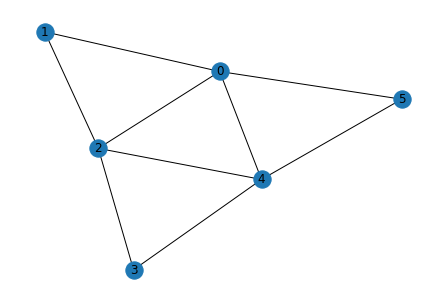

[(0, 5), (5, 4), (4, 3), (3, 2), (2, 4), (4, 0), (0, 2), (2, 1), (1, 0)]


In [16]:
# Euler circuit aka unicursal drawing
# Euler circuit exists if and only if the graph is connected and every vertex has even degree
g_ec = nx.Graph()
g_ec.add_nodes_from([0,1,2,3,4,5])
g_ec.add_edges_from([(0,1),(0,2),(0,4),(0,5),(1,2),(2,3),(3,4),(2,4),(4,5)])
nx.draw(g_ec, with_labels=True)
plt.show()

# Euler circuit
ec = nx.eulerian_circuit(g_ec)
print(list(ec))


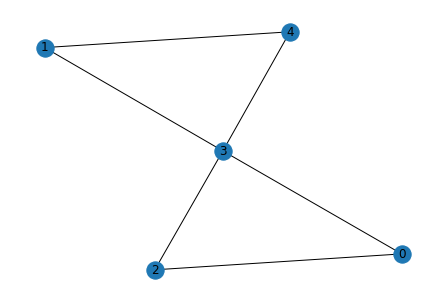

[(0, 2), (2, 3), (3, 1), (1, 4), (4, 3)]


In [19]:
# Fleurys Algorithm
# 1. Find an edge that is not part of a cycle
# 2. Remove the edge and add it to the path
# 3. Repeat steps 1 and 2 until all the edges have been visited
# 4. The path is an Euler path

# Using NetworkX
g_fa = nx.Graph()
g_fa.add_nodes_from([0,1,2,3,4])
g_fa.add_edges_from([(0,2),(0,3),(1,3),(1,4),(2,3),(3,4)])
nx.draw(g_fa, with_labels=True)
plt.show()

# Remove edge (0,3)
g_fa.remove_edge(0,3)

# Fleurys Algorithm
fa = nx.eulerian_path(g_fa) 
print(list(fa))

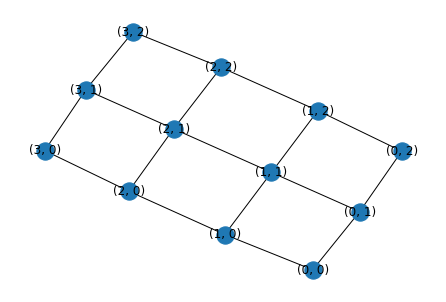

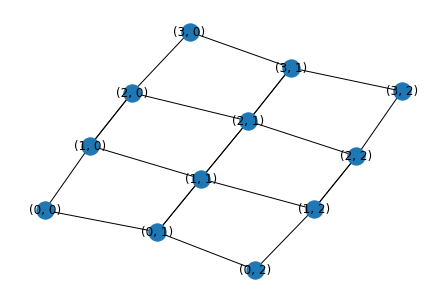

In [22]:
# Eulerization of a graph
# Eulerization of a graph is the process of adding edges to a graph to make it Eulerian
# Eulerization of a graph is possible if and only if the graph is connected and has 0 or 2 vertices with odd degree
# Eulerization of a graph is not possible if the graph has more than 2 vertices with odd degree

# Using NetworkX for a grid graph
g_eg = nx.grid_2d_graph(4,3)
nx.draw(g_eg, with_labels=True)
plt.show()

# Eulerization of a graph
eg = nx.eulerize(g_eg)
nx.draw(eg, with_labels=True)
plt.show()


In [26]:
# Hamiltonian path
# Hamiltonian path is a path that visits every vertex exactly once with no repeated edges
# Hamiltonian path exists if and only if the graph is connected and has at least n vertices
# Hamiltonian circuit is a Hamiltonian path that starts and ends at the same vertex

# Using NetworkX on a Directed Graph
g_hp = nx.DiGraph()
g_hp.add_nodes_from([0,1,2,3,4,5])
g_hp.add_edges_from([(0,1),(0,2),(0,3),(0,4),(0,5),(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)])

# Hamiltonian path
hp = nx.algorithms.tournament.hamiltonian_path(g_hp)
print(list(hp))


[0, 1, 2, 3, 4, 5]


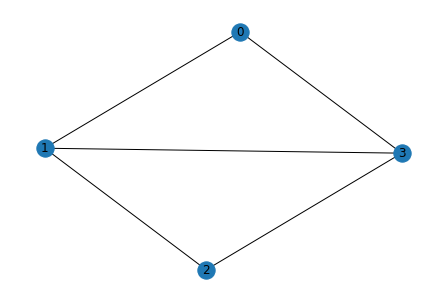

[0, 3, 2, 1, 0]


In [31]:
# Travelling Salesman Problem
# Travelling Salesman Problem is the problem of finding the shortest path that visits every vertex exactly once and returns to the starting vertex
# Travelling Salesman Problem is NP-Hard because it is in NP and it is not in NP-Complete
# Travelling Salesman is the solution to the Hamiltonian path problem


# Using NetworkX
g_tsp = nx.Graph()
g_tsp.add_nodes_from([0,1,2,3,])
g_tsp.add_edges_from([(0,1),(0,3),(1,2),(1,3),(2,3)])
nx.draw(g_tsp, with_labels=True)
plt.show()

# Travelling Salesman Problem
tsp = nx.approximation.traveling_salesman_problem
print(tsp(g_tsp))

# Not efficient to solve the Travelling Salesman Problem for large graphs
# How many paths would a complete graph with 8 vertices (9 nodes) have?
# (9-1)! = 8! = 40320
# The number of circuits in a complete graph with n vertices is (n-1)!/2
# (9-1)!/2 = 40320/2 = 20160

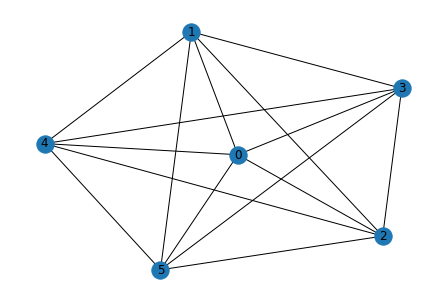

[0, 5, 3, 2, 4, 1, 0]


In [36]:
# Using a more Heuristic approach (Greedy Algorithm)
# Greedy Algorithm is an algorithm that makes the best choice at each step
# Nearest Neighbor Travelling Salesman Problem
# 1. Start at a vertex
# 2. Go to the nearest vertex that has not been visited
# 3. Repeat step 2 until all the vertices have been visited
# 4. Return to the starting vertex

# Using NetworkX
g_nn = nx.Graph()
g_nn.add_nodes_from([0,1,2,3,4,5])
g_nn.add_edges_from([(0,1), (0,2), (0,3), (0,4), (0,5), (1,2), (1,3), (1,4), (1,5), (2,3), (2,4), (2,5), (3,4), (3,5), (4,5)])
nx.draw(g_nn, with_labels=True)
plt.show()

# Nearest Neighbor Travelling Salesman Problem
tsp = nx.approximation.traveling_salesman_problem
print(tsp(g_nn, 'greedy_tsp'))
